# Walmart - Confidence Interval and CLT

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).



### Importing the required libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



### Importing the dataset

In [3]:
df = pd.read_csv('walmart_data.txt')

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## Checking the structure & characteristics of the dataset

In [5]:
#length of data
len(df)

550068

In [6]:
df.shape

(550068, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [8]:
df.isna().sum() # Checking for the missing values

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [9]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [10]:
#checking dtypes
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [11]:
df['Age'].nunique(), df['Gender'].nunique()

(7, 2)

In [12]:
df['City_Category'].value_counts()

City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

In [13]:
df['Occupation'].value_counts(), df['Occupation'].nunique()

(Occupation
 4     72308
 0     69638
 7     59133
 1     47426
 17    40043
 20    33562
 12    31179
 14    27309
 2     26588
 16    25371
 6     20355
 3     17650
 10    12930
 5     12177
 15    12165
 11    11586
 19     8461
 13     7728
 18     6622
 9      6291
 8      1546
 Name: count, dtype: int64,
 21)

In [14]:
df['Stay_In_Current_City_Years'].value_counts(), df['Stay_In_Current_City_Years'].nunique()

(Stay_In_Current_City_Years
 1     193821
 2     101838
 3      95285
 4+     84726
 0      74398
 Name: count, dtype: int64,
 5)

In [15]:
df['Product_Category'].value_counts(), df['Product_Category'].nunique()

(Product_Category
 5     150933
 1     140378
 8     113925
 11     24287
 2      23864
 6      20466
 3      20213
 4      11753
 16      9828
 15      6290
 13      5549
 10      5125
 12      3947
 7       3721
 18      3125
 20      2550
 19      1603
 14      1523
 17       578
 9        410
 Name: count, dtype: int64,
 20)

## Detecting and handling of Outliers 
### Detecting Outliers

In [16]:
# Continuous Variables: Age, Purchase
# here Age is represented in ranges
# categorical Variables: User_ID, Product_ID, Gender, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status and Product_Category

In [17]:
df['Age'].describe()

count     550068
unique         7
top        26-35
freq      219587
Name: Age, dtype: object

In [18]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [19]:
df['Age'].value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

<Axes: xlabel='Age'>

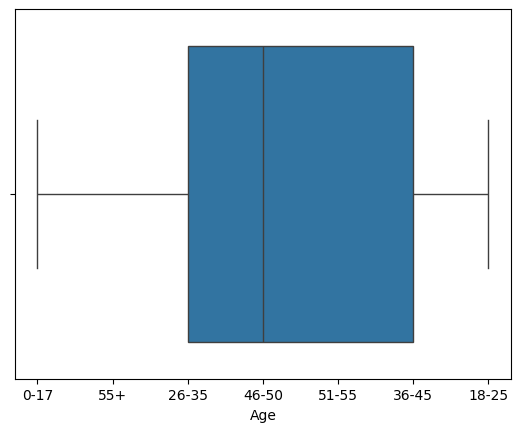

In [20]:
sns.boxplot(data = df['Age'], orient = "h")

There are no outliers present in the data and 50% of data present before & after the 46-50 age group.
50% of data related to age groups between 26-35 and 36-55 age groups

<Axes: xlabel='Purchase'>

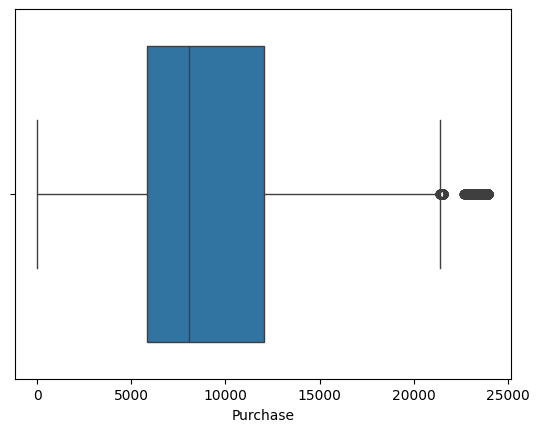

In [21]:
sns.boxplot(data = df['Purchase'], orient = "h")

There are outliers present in the data and most of the purchase amount fall between 5000 to 13000.

In [22]:
# Calculate outliers based on Purchase using IQR method
Q1 = df['Purchase'].quantile(0.25)
Q3 = df['Purchase'].quantile(0.75)
IQR = Q3 - Q1
IQR

6231.0

In [23]:
# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['Purchase'] < lower_bound) | (df['Purchase'] > upper_bound)]

# Count outliers
num_outliers = len(outliers)
print(lower_bound, upper_bound, num_outliers)

-3523.5 21400.5 2677


In [24]:
outliers

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,M,26-35,2,B,3,0,10,23603
375,1000062,P00119342,F,36-45,3,A,1,0,10,23792
652,1000126,P00087042,M,18-25,9,B,1,0,10,23233
736,1000139,P00159542,F,26-35,20,C,2,0,10,23595
1041,1000175,P00052842,F,26-35,2,B,1,0,10,23341
...,...,...,...,...,...,...,...,...,...,...
544488,1005815,P00116142,M,26-35,20,B,1,0,10,23753
544704,1005847,P00085342,F,18-25,4,B,2,0,10,23724
544743,1005852,P00202242,F,26-35,1,A,0,1,10,23529
545663,1006002,P00116142,M,51-55,0,C,1,1,10,23663


In [25]:
# Cliping the data between whiskers of a box plot
# df['Purchase'] = df['Purchase'].clip(lower=lower_bound, upper=upper_bound)

### Cliping the data between the 5 percentile and 95 percentile

In [26]:
# Calculate 5th and 95th percentiles
p5 = np.percentile(df['Purchase'], 5)
p95 = np.percentile(df['Purchase'], 95)
p5, p95

(1984.0, 19336.0)

In [27]:
# Cliping the data between the 5 percentile and 95 percentile
clipped_data = pd.DataFrame(np.clip(df['Purchase'], p5, p95))

In [28]:
clipped_data.head()

,Purchase
0,8370
1,15200
2,1984
3,1984
4,7969


In [29]:
clipped_data.index

RangeIndex(start=0, stop=550068, step=1)

In [30]:
df['no.'] = df.index + 1
clipped_data['no.'] = clipped_data.index +1

In [31]:
clipped_data.head()

,Purchase,no.
0,8370,1
1,15200,2
2,1984,3
3,1984,4
4,7969,5


In [32]:
w_df = df.merge(clipped_data, how = 'inner', on = 'no.')

In [33]:
w_df.drop(['Purchase_x', 'no.'] , axis = 1, inplace = True)
df.drop('no.', axis = 1, inplace = True)

In [34]:
w_df.rename({'Purchase_y' : 'Purchase'}, axis = 1, inplace = True)

In [35]:
w_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1984
3,1000001,P00085442,F,0-17,10,A,2,0,12,1984
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [36]:
w_df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

## Data Exploration

### The relationship between products and age groups

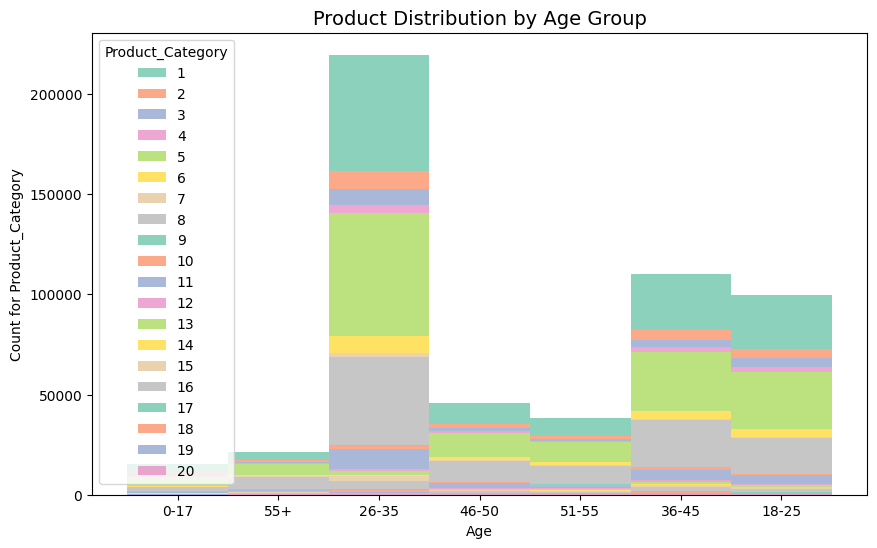

In [37]:
# What products are different age groups buying?
plt.figure(figsize=(10, 6))
sns.histplot(data=w_df, x='Age', hue='Product_Category', multiple='stack', palette='Set2', edgecolor = None)
plt.title('Product Distribution by Age Group', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Count for Product_Category') 
plt.show()

#### Inference:
1. The product categories 1, 5 and 8 are more frequently purchased by all age group individuals. The share in the entire product purcheses category is high as compared with others product categories.
2. Overall the more number of products purchased by 26-35 age group individuals, and followed by 36-45 and 18-25 age groups.
3. The number of products purchased by 0-17 and 55+ age group individuals is low.

### Relationship between age, marital status, and the amount spent

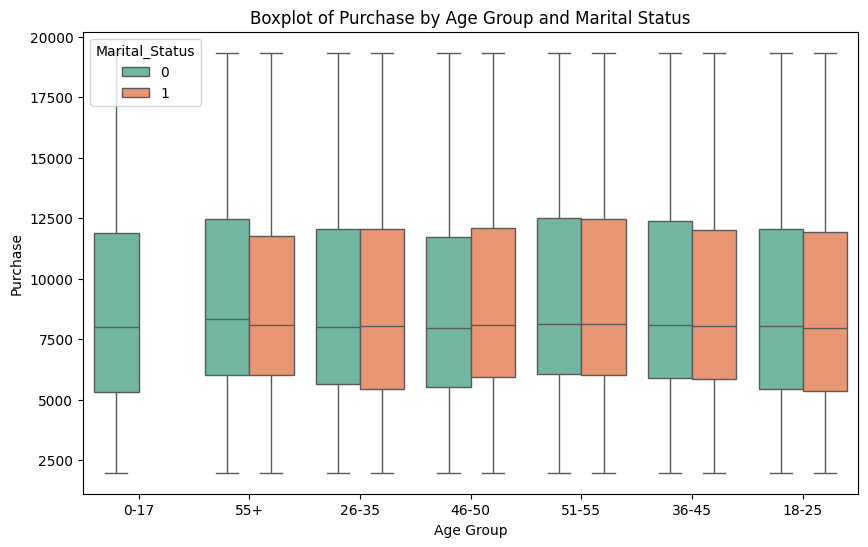

In [38]:
# Multivariate analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Purchase', hue='Marital_Status', data=w_df, palette='Set2')
plt.title('Boxplot of Purchase by Age Group and Marital Status')
plt.xlabel('Age Group')
plt.ylabel('Purchase')
plt.show()

#### Inference
1. From the above analysis, single and partnered individuals having almost equal means for all age groups except 0-17 age group, since it consists only unmarried (single) individuals.
2. The 55+ age group single individuals purchases more than married individuals.

### The preferred product categories for genders

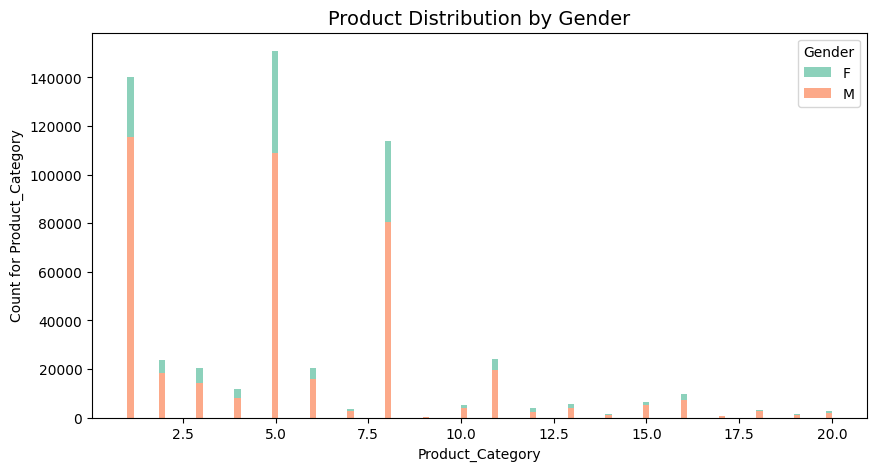

In [39]:
plt.figure(figsize=(10, 5))
sns.histplot(data=w_df, x='Product_Category', hue='Gender', multiple='stack', palette='Set2', edgecolor = None)
plt.title('Product Distribution by Gender', fontsize=14)
plt.xlabel('Product_Category')
plt.ylabel('Count for Product_Category') 
plt.show()

#### Inference:
1. The product categories 1,5 and 8 more frequently brought by male customers than females.
2. overall the number of products brought by male customers is more than female for each product category.

## The affect of gender on amount spent :

### Confidence Intervals (CI) for the average amount spent per gender

Using bootstrapping to compute the 95% confidence intervals (CI) for the average amount spent per gender

In [47]:
w_df['Gender'].value_counts(normalize = True) 

Gender
M    0.753105
F    0.246895
Name: proportion, dtype: float64

In [45]:
w_df.groupby('Gender')['User_ID'].nunique()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

In [40]:
 w_df[w_df['Gender'] == 'M']['Purchase'].mean()

9427.240996574606

In [41]:
 w_df[w_df['Gender'] == 'F']['Purchase'].mean()

8736.540266109021

In [43]:
# Gender wise spending on products
w_df.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8736.540266,4596.984614,1984.0,5433.0,7914.0,11400.0,19336.0
M,414259.0,9427.240997,4925.953492,1984.0,5863.0,8098.0,12454.0,19336.0


<Axes: xlabel='Gender', ylabel='Purchase'>

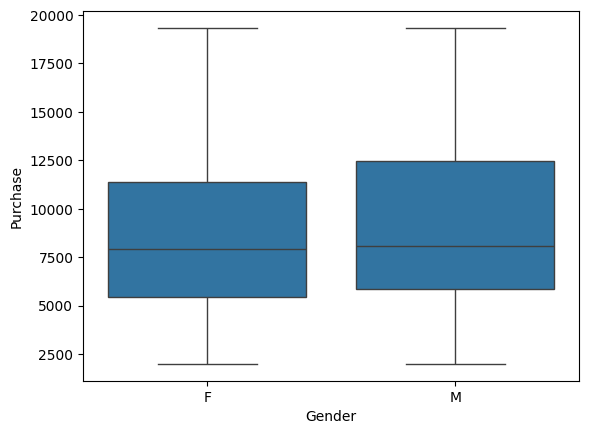

In [49]:
import seaborn as sbn
sbn.boxplot(x = 'Gender', y= 'Purchase', data = w_df)

we can not say that there is a significant difference between amount spent by male and female, so we can not conclude it for the population. So we have to use CLT here.

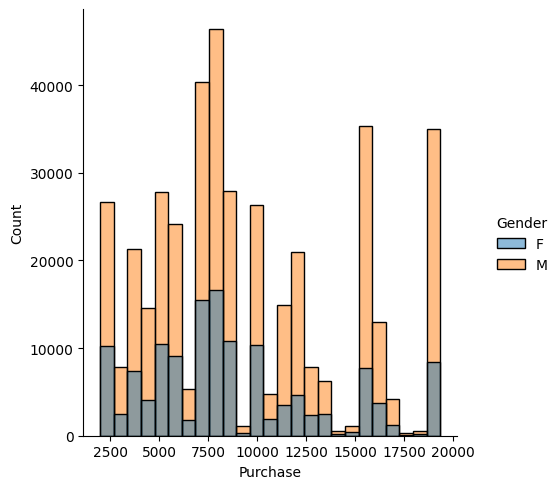

In [53]:
sbn.displot(x = 'Purchase', data = w_df, bins = 25, hue = 'Gender')

It is  not a normal distribution, approximately it is more like right skwed data.

In [42]:
len(w_df[w_df['Gender'] == 'M']['Purchase']), len(w_df[w_df['Gender'] == 'F']['Purchase'])

(414259, 135809)

In [43]:
# Function to calculate bootstrap sample and confidence interval
sample_means_data_lists = []
def bootstrap_mean_ci(data, n_bootstrap=1000, alpha=0.05):
    n = len(data)
    bootstrap_means = np.zeros(n_bootstrap)
    
    for i in range(n_bootstrap):
        bootstrap_sample = np.random.choice(data, size=n, replace=True) # the original data should be maintained With Replacement is true, the means are independent of each other.
        bootstrap_means[i] = np.mean(bootstrap_sample)
    global sample_means_data_lists
    sample_means_data_lists.append(bootstrap_means)
    
    # Calculate 1-alpha confidence interval
    lower_percentile = 100 * alpha / 2
    upper_percentile = 100 * (1 - alpha / 2)
    ci = np.percentile(bootstrap_means, [lower_percentile, upper_percentile])
    
    return ci

In [44]:
sample_sizes = [len(w_df), 300, 3000, 30000]

In [45]:
# Calculating confidence intervals for each sample size
for size in sample_sizes:
    subset_data = w_df.sample(size, replace=False)  # Sample without replacement for smaller sizes
    males_data = subset_data[subset_data['Gender'] == 'M']['Purchase']
    females_data = subset_data[subset_data['Gender'] == 'F']['Purchase']
    
    # Calculate bootstrap confidence intervals for males
    ci_males = bootstrap_mean_ci(males_data)
    
    # Calculate bootstrap confidence intervals for females
    ci_females = bootstrap_mean_ci(females_data)
    
    print(f"Sample Size: {size}")
    print(f"Male Purchase CI: {ci_males}")
    print(f"Female Purchase CI: {ci_females}")
    print()

Sample Size: 550068
Male Purchase CI: [9412.04397659 9441.66359168]
Female Purchase CI: [8711.69042166 8760.98135875]

Sample Size: 300
Male Purchase CI: [ 8852.59343318 10089.85887097]
Female Purchase CI: [6869.15572289 8819.64277108]

Sample Size: 3000
Male Purchase CI: [9333.80434489 9733.43114588]
Female Purchase CI: [8661.92240051 9291.04342105]

Sample Size: 30000
Male Purchase CI: [9319.77187041 9447.77518927]
Female Purchase CI: [8618.64555997 8823.58385023]



Is the confidence interval computed using the entire dataset wider for
one of the genders? 
1. The confidence interval for females purchase data is [9412.04, 9441.66] and for females purchase data is [8711.69, 8760.98]
2. The confidence interval for females purchase data is wider than males purchase data. The sample size of females purchase data is less than the males purchase data. The confidence interval range depends on size of the data or sample.
3. When the sample size is smaller, each individual data point has a larger influence on the overall statistics (like the mean or standard deviation). This can lead to more variability in sample statistics from one sample to another.As a result, the confidence interval tends to be wider because there is greater uncertainty about the true population parameter.
4. A wider confidence interval means that we are less precise in estimating where the population parameter lies.
5. With a larger sample size, individual data points have less influence on the overall statistics. Sample statistics from larger samples tend to be more stable and consistent across different samples. This results in narrower confidence intervals because we have more confidence in the estimate of the population parameter. A narrower confidence interval indicates greater precision in estimating where the population parameter lies.

How is the width of the confidence interval affected by the sample size?

As the sample size increases from 300 to 3000 and then to 30000, we observe a noticeable reduction in the width of the confidence interval. This narrowing indicates that with larger samples, there is less variability in our estimates of the mean. In other words, as we gather more data points, we become more confident and precise in our estimation of the true average value in the population.

Do the confidence intervals for different sample sizes overlap?
1. The CI for Sample Size 300 overlaps with both Sample Size 3000 and Sample Size 30000.The CI for Sample Size 3000 overlaps with Sample Size 30000.
2. Therefore, all three confidence intervals overlap, indicating that there is no significant difference in the estimated means between these sample sizes at the chosen confidence level.But we can estimate the population mean more precisely, so that we can conclude that the males are spending more than females with 95% confidence

In [46]:
len(sample_means_data_lists)

8

In [47]:

male_purchase_means_data = sample_means_data_lists[0]
female_purchase_means_data = sample_means_data_lists[1]
male_purchase_means_data_300 = sample_means_data_lists[2]
female_purchase_means_data_300 = sample_means_data_lists[3]
male_purchase_means_data_3000 = sample_means_data_lists[4]
female_purchase_means_data_3000 = sample_means_data_lists[5]
male_purchase_means_data_30000 = sample_means_data_lists[6]
female_purchase_means_data_30000 = sample_means_data_lists[7]

Text(0.5, 1.0, 'Distribution of female_purchase_means_data_30000')

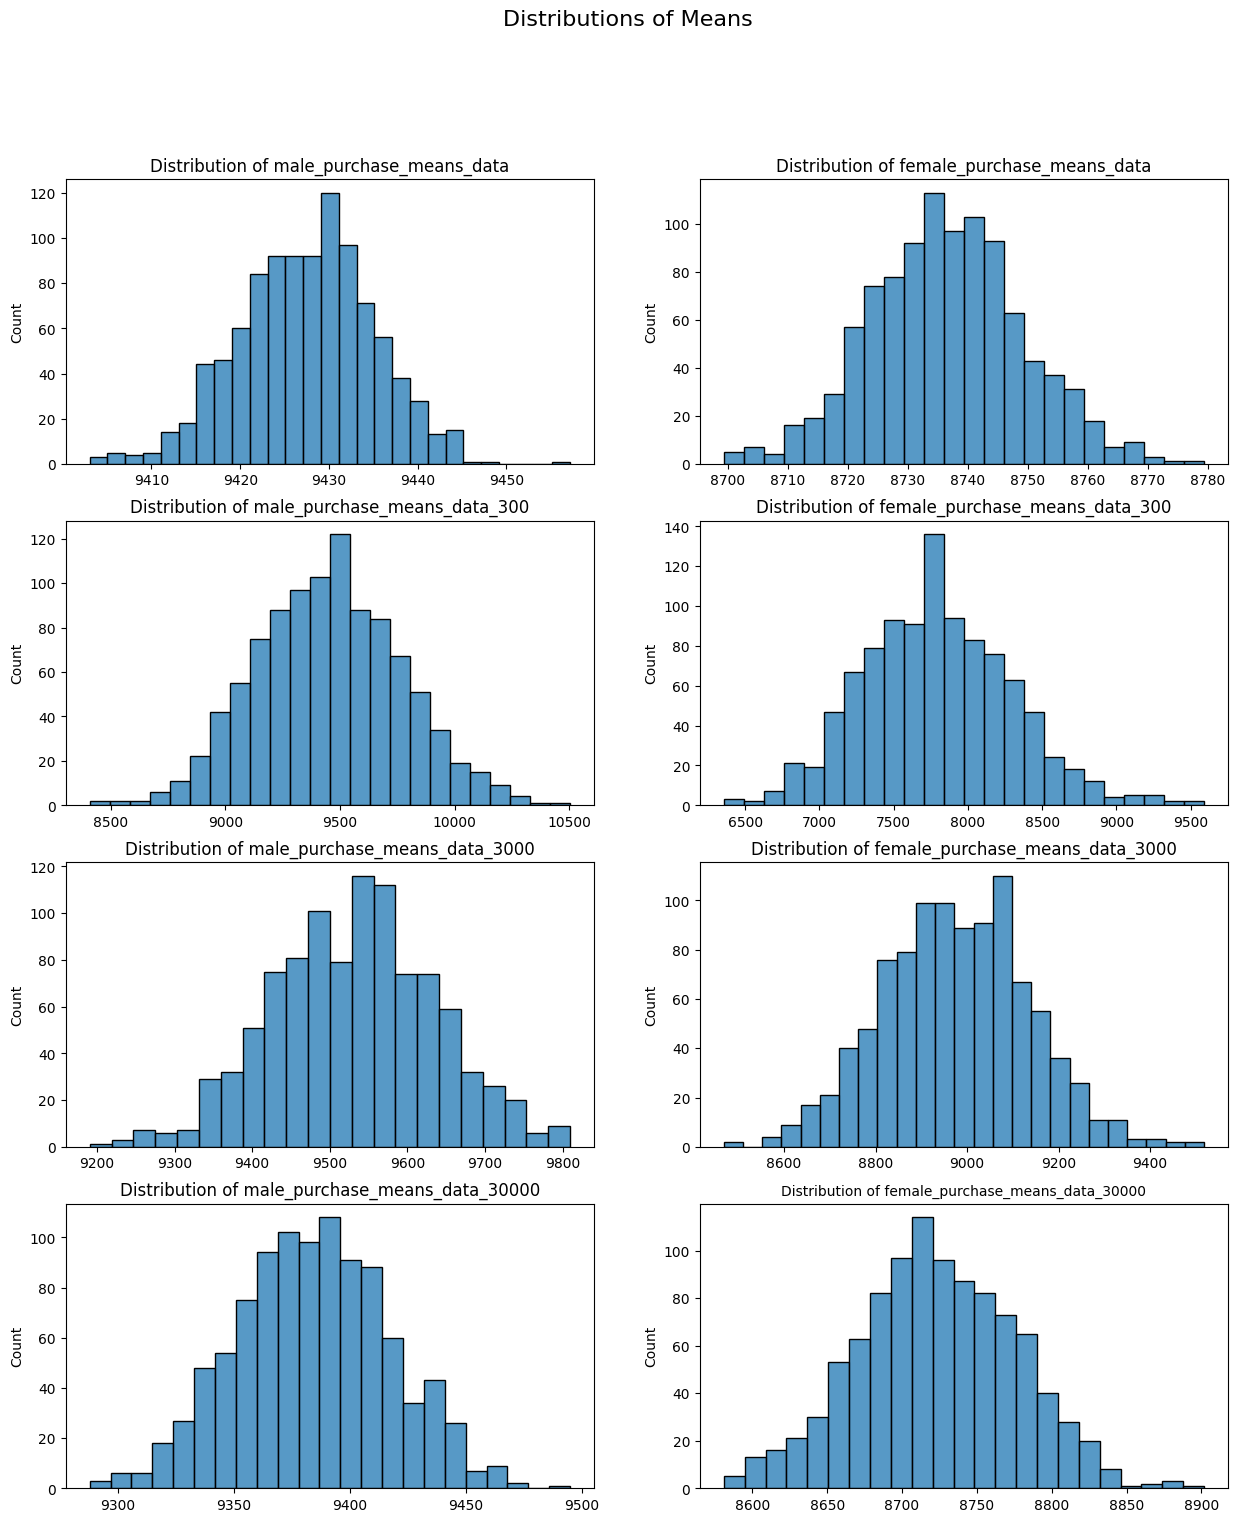

In [48]:
fig = plt.figure(figsize=(15,17))
fig.suptitle('Distributions of Means', fontsize=16)
plt.subplot(4, 2, 1)
sns.histplot(male_purchase_means_data)
plt.title('Distribution of male_purchase_means_data', fontsize=12)

plt.subplot(4, 2, 2)
sns.histplot(female_purchase_means_data)
plt.title('Distribution of female_purchase_means_data', fontsize=12)

plt.subplot(4, 2, 3)
sns.histplot(male_purchase_means_data_300)
plt.title('Distribution of male_purchase_means_data_300', fontsize=12)

plt.subplot(4, 2, 4)
sns.histplot(female_purchase_means_data_300)
plt.title('Distribution of female_purchase_means_data_300', fontsize=12)

plt.subplot(4, 2, 5)
sns.histplot(male_purchase_means_data_3000)
plt.title('Distribution of male_purchase_means_data_3000', fontsize=12)

plt.subplot(4, 2, 6)
sns.histplot(female_purchase_means_data_3000)
plt.title('Distribution of female_purchase_means_data_3000', fontsize=12)

plt.subplot(4, 2, 7)
sns.histplot(male_purchase_means_data_30000)
plt.title('Distribution of male_purchase_means_data_30000', fontsize=12)

plt.subplot(4, 2, 8)
sns.histplot(female_purchase_means_data_30000)
plt.title('Distribution of female_purchase_means_data_30000', fontsize=10)

How does the sample size affect the shape of the distributions of the
means?
1. The sample size significantly influences the shape of the distribution of sample means. Based on the Central Limit Theorem (CLT), as the sample size increases, the distribution of sample means tends to approximate a normal distribution, regardless of the shape of the population distribution from which the samples are drawn.
2. With smaller sample sizes, the distribution of sample means tends to reflect the shape and variability of the population distribution more closely.
If the population distribution is skewed or has outliers, small sample sizes may result in sample means that are similarly skewed or influenced by outliers.
3. As the sample size increases, the distribution of sample means becomes narrower, more symmetric and will approximate a normal distribution, regardless of the shape of the original population distribution.This is because larger samples provide more data points and reduce the impact of individual extreme values, leading to a smoother and more bell-shaped distribution of means.
4. Here the sample size with 30000, that the distribution of sample means is more bell-shaped and pretty good symmetry as compared with other samples, resembling a normal distribution.

In [49]:
!pip install scipy



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Performing Two-Sample T-Test:

In [50]:
 m_df = w_df[w_df['Gender'] == 'M']['Purchase']
f_df =  w_df[w_df['Gender'] == 'F']['Purchase']
m_df_mean = m_df.mean()
f_df_mean = f_df.mean()
print(m_df_mean, f_df_mean)

9427.240996574606 8736.540266109021


> H0: There is no significant difference in average spent amount between male and female i.e. μ1 = μ2 ( μ1 = Mean purchase amount spent by males and μ2 = Mean purchase amount spent by females)
> 
> Ha: Average amount spent by male is more than female i.e. μ1 > μ2

In [51]:
from scipy.stats import ttest_ind
t_stat, pvalue = ttest_ind(m_df, f_df, alternative = 'greater')
print("test statistic:",t_stat)
print("p_value:",pvalue)

test statistic: 45.574933432542736
p_value: 0.0


α=0.05  for confidence level 95%

In [52]:
if pvalue < 0.05:
    print("Reject H0")
    print("There is significant difference in average spent amount between male and female, average amount spent by male is more than female.")
else:
    print("Fail to reject H0")
    print("There is no significant difference in average spent amount between male and female.")

Reject H0
There is significant difference in average spent amount between male and female, average amount spent by male is more than female.


## The affect of marital_status on amount spent :

### Confidence Intervals (CI) for the average amount spent based on marital_status

In [53]:
w_df[w_df['Marital_Status'] == 0]['Purchase'].mean()

9258.820463706883

In [54]:
w_df[w_df['Marital_Status'] == 1]['Purchase'].mean()

9253.669823420034

In [55]:
# Function to calculate bootstrap sample and confidence interval
sample_means_data_list1 = []
def bootstrap_mean_ci(data, n_bootstrap=1000, alpha=0.05):
    n = len(data)
    bootstrap_means = np.zeros(n_bootstrap)
    
    for i in range(n_bootstrap):
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        bootstrap_means[i] = np.mean(bootstrap_sample)
    global sample_means_data_lists
    sample_means_data_list1.append(bootstrap_means)
    
    # Calculate 1-alpha confidence interval
    lower_percentile = 100 * alpha / 2
    upper_percentile = 100 * (1 - alpha / 2)
    ci = np.percentile(bootstrap_means, [lower_percentile, upper_percentile])
    
    return ci

In [56]:
sample_sizes = [len(w_df), 300, 3000, 30000]

In [57]:
# Calculating confidence intervals for each sample size
for size in sample_sizes:
    subset_data = w_df.sample(size, replace=False)  # Sample without replacement for smaller sizes
    males_data = subset_data[subset_data['Marital_Status'] == 0]['Purchase']
    females_data = subset_data[subset_data['Marital_Status'] == 1]['Purchase']
    
    # Calculate bootstrap confidence intervals for males
    ci_males = bootstrap_mean_ci(males_data)
    
    # Calculate bootstrap confidence intervals for females
    ci_females = bootstrap_mean_ci(females_data)
    
    print(f"Sample Size: {size}")
    print(f"Unmarried Purchase CI: {ci_males}")
    print(f"Married Purchase CI: {ci_females}")
    print()

Sample Size: 550068
Unmarried Purchase CI: [9240.67864186 9274.46026704]
Married Purchase CI: [9234.21014658 9273.12997566]

Sample Size: 300
Unmarried Purchase CI: [8596.72581522 9975.89741848]
Married Purchase CI: [ 8582.88426724 10262.18900862]

Sample Size: 3000
Unmarried Purchase CI: [9143.48231813 9616.73012413]
Married Purchase CI: [8841.74643139 9367.07754338]

Sample Size: 30000
Unmarried Purchase CI: [9214.97173311 9358.70623729]
Married Purchase CI: [9142.05473682 9309.54632485]



Is the confidence interval computed using the entire dataset wider for particular marital status ?

1. The confidence interval for married individuals purchase data is wider than unmarried individuals purchase data.
2. The sample size of married individuals purchase data is less than the unarried individuals purchase data. 
The confidence interval range depends on size of the data or sample.


How is the width of the confidence interval affected by the sample size?

As the sample size increases from 300 to 3000 and then to 30000, we observe a noticeable reduction in the width of the confidence interval. This narrowing indicates that with larger samples, there is less variability in our estimates of the mean. In other words, as we gather more data points, we become more confident and precise in our estimation of the true average value in the population.

Do the confidence intervals for different sample sizes overlap?
1. The CI for Sample Size 300 overlaps with both Samples unmarried and married individuals, we can not conclude that the unmarried individuals spent more amount than married individuals.
2. The CI for Sample Size 3000 and 30000 doesn't overlaps for unmarried and married individuals which can estimates for population that the mean amount spent by umarried individuals is more then the married individuals.

In [58]:
unmarried_purchase_means_data = sample_means_data_list1[0]
married_purchase_means_data = sample_means_data_lists[1]
unmarried_purchase_means_data_300 = sample_means_data_list1[2]
married_purchase_means_data_300 = sample_means_data_list1[3]
unmarried_purchase_means_data_3000 = sample_means_data_list1[4]
married_purchase_means_data_3000 = sample_means_data_list1[5]
unmarried_purchase_means_data_30000 = sample_means_data_list1[6]
married_purchase_means_data_30000 = sample_means_data_list1[7]

Text(0.5, 1.0, 'Distribution of married_purchase_means_data_30000')

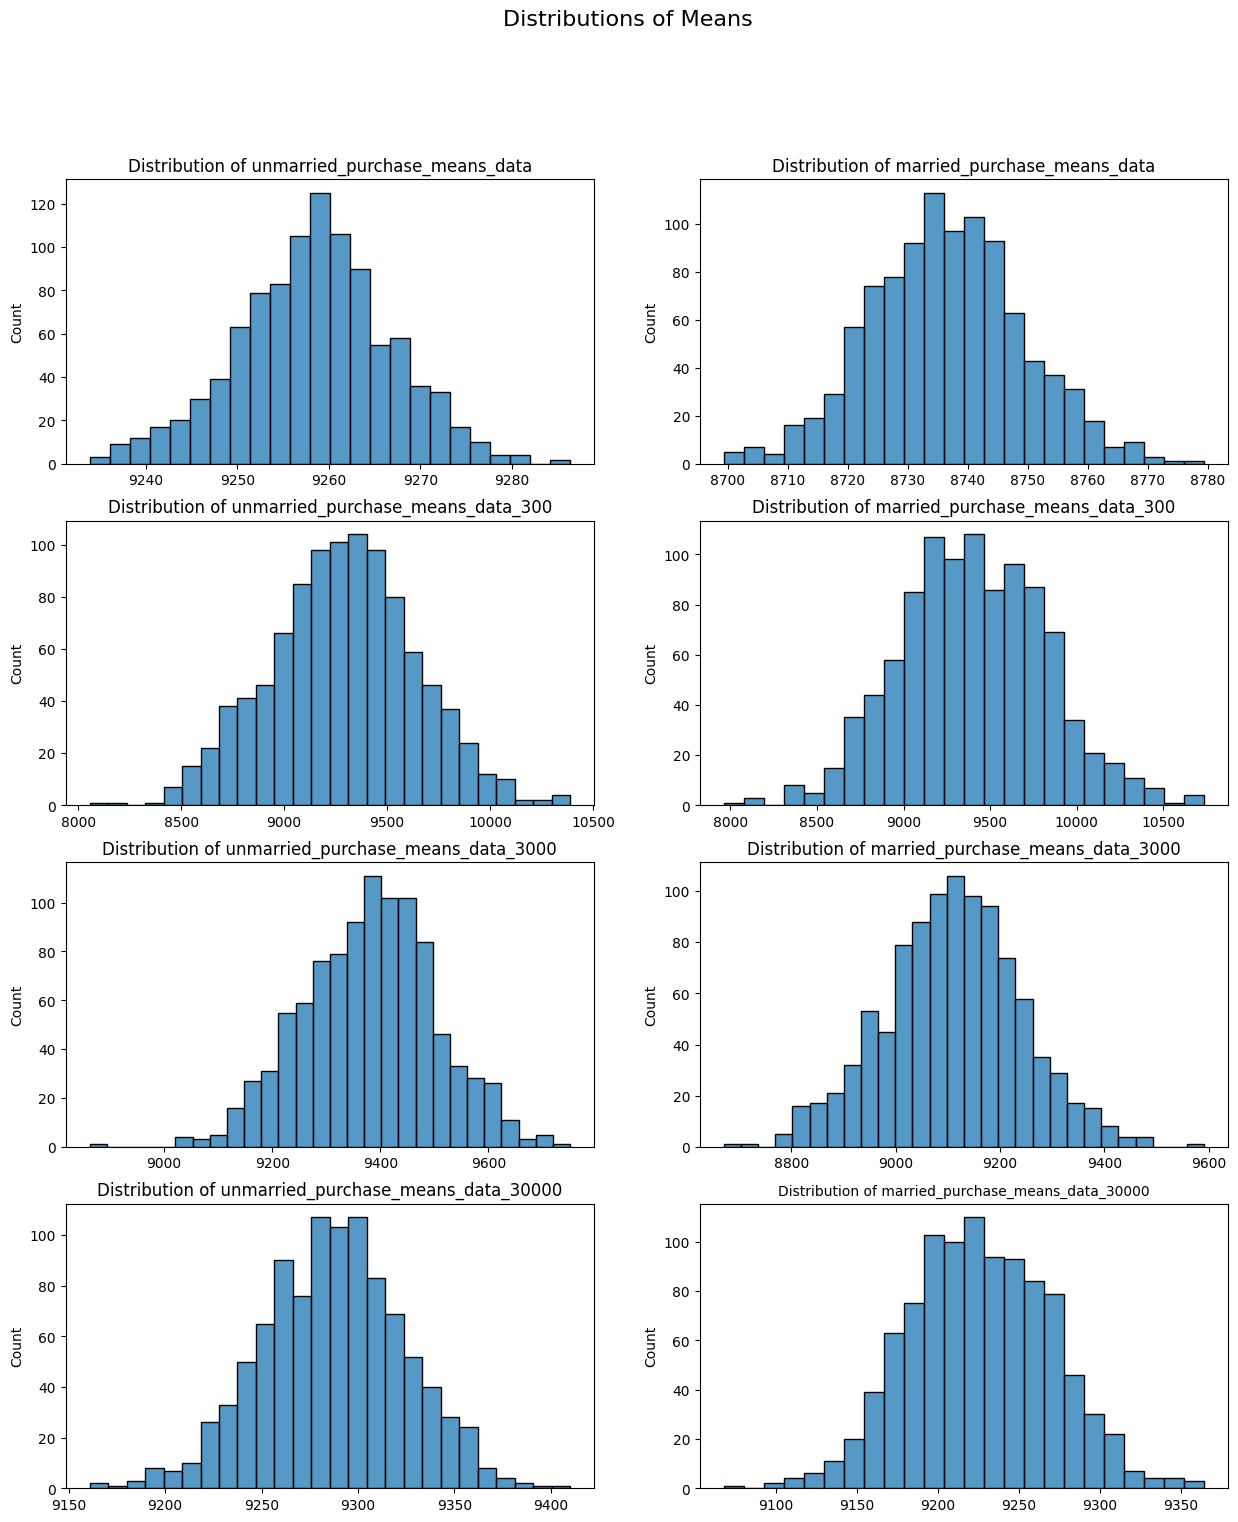

In [59]:
fig = plt.figure(figsize=(15,17))
fig.suptitle('Distributions of Means', fontsize=16)
plt.subplot(4, 2, 1)
sns.histplot(unmarried_purchase_means_data)
plt.title('Distribution of unmarried_purchase_means_data', fontsize=12)

plt.subplot(4, 2, 2)
sns.histplot(married_purchase_means_data)
plt.title('Distribution of married_purchase_means_data', fontsize=12)

plt.subplot(4, 2, 3)
sns.histplot(unmarried_purchase_means_data_300)
plt.title('Distribution of unmarried_purchase_means_data_300', fontsize=12)

plt.subplot(4, 2, 4)
sns.histplot(married_purchase_means_data_300)
plt.title('Distribution of married_purchase_means_data_300', fontsize=12)

plt.subplot(4, 2, 5)
sns.histplot(unmarried_purchase_means_data_3000)
plt.title('Distribution of unmarried_purchase_means_data_3000', fontsize=12)

plt.subplot(4, 2, 6)
sns.histplot(married_purchase_means_data_3000)
plt.title('Distribution of married_purchase_means_data_3000', fontsize=12)

plt.subplot(4, 2, 7)
sns.histplot(unmarried_purchase_means_data_30000)
plt.title('Distribution of unmarried_purchase_means_data_30000', fontsize=12)

plt.subplot(4, 2, 8)
sns.histplot(married_purchase_means_data_30000)
plt.title('Distribution of married_purchase_means_data_30000', fontsize=10)

How does the sample size affect the shape of the distributions of the
means?
1. The sample size significantly influences the shape of the distribution of sample means. Based on the Central Limit Theorem (CLT), as the sample size increases, the distribution of sample means tends to approximate a normal distribution, regardless of the shape of the population distribution from which the samples are drawn.
2. Here the sample size with 30000, that the distribution of sample means is smoother, more bell-shaped and pretty good symmetry as compared with other samples, resembling a normal distribution.

### Performing Two-Sample T-Test:

In [60]:
 un_df = w_df[w_df['Marital_Status'] == 0]['Purchase']
ma_df =  w_df[w_df['Marital_Status'] == 1]['Purchase']
un_df_mean = un_df.mean()
ma_df_mean = ma_df.mean()
print(un_df_mean, ma_df_mean)

9258.820463706883 9253.669823420034


> H0: There is no significant difference in average spent amount between single(unmarried) and partnered(married) individuals i.e. μ1 = μ2 ( μ1 = Mean purchase amount spent by unmarried individuals and μ2 = Mean purchase amount spent by partnered individuals)
> 
> Ha: There is a significant difference in average spent amount between single(unmarried) and partnered(married) individuals i.e. μ1 != μ2

In [61]:
from scipy.stats import ttest_ind
t_stat, pvalue = ttest_ind(un_df, ma_df, alternative = 'two-sided')
print("test statistic:",t_stat)
print("p_value:",pvalue)

test statistic: 0.3868627106847199
p_value: 0.69885799801922


In [62]:
# α=0.05 for confidence level 95%
if pvalue < 0.05:
    print("Reject H0")
    print("There is a significant difference in average spent amount between single(unmarried) and partnered(married) individuals.")
else:
    print("Fail to reject H0")
    print("There is no significant difference in average spent amount between single(unmarried) and partnered(married) individuals.")

Fail to reject H0
There is no significant difference in average spent amount between single(unmarried) and partnered(married) individuals.


## The affect of Age on amount spent :

In [63]:
age_groups = w_df['Age'].unique()

In [64]:
# Function to compute bootstrap mean and confidence interval
def bootstrap_mean_ci(data, n_bootstrap=1000, alpha=0.05):
    bootstrap_means = []
    for _ in range(n_bootstrap):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_means.append(np.mean(bootstrap_sample))
    
    # Calculate confidence interval
    lower_percentile = 100 * alpha / 2
    upper_percentile = 100 * (1 - alpha / 2)
    ci = np.percentile(bootstrap_means, [lower_percentile, upper_percentile])
    
    return ci

# Calculating confidence intervals for each age group
cis = {}
for age_group in age_groups:
    data_subset = w_df[w_df['Age'] == age_group]['Purchase']
    ci = bootstrap_mean_ci(data_subset)
    cis[age_group] = ci

# Print confidence intervals
for age_group, ci in cis.items():
    print(f"Age Group: {age_group}, 95% CI for mean Purchase: [{ci[0]:.2f}, {ci[1]:.2f}]")

Age Group: 0-17, 95% CI for mean Purchase: [8863.66, 9021.81]
Age Group: 55+, 95% CI for mean Purchase: [9261.34, 9389.51]
Age Group: 26-35, 95% CI for mean Purchase: [9225.06, 9262.69]
Age Group: 46-50, 95% CI for mean Purchase: [9158.86, 9246.27]
Age Group: 51-55, 95% CI for mean Purchase: [9467.92, 9560.86]
Age Group: 36-45, 95% CI for mean Purchase: [9295.82, 9352.47]
Age Group: 18-25, 95% CI for mean Purchase: [9139.60, 9200.78]


In [74]:
len(w_df[w_df['Age'] == '0-17']), len(w_df[w_df['Age'] == '55+']), len(w_df[w_df['Age'] == '26-35']),len(w_df[w_df['Age'] == '46-50'])

(15102, 21504, 219587, 45701)

In [75]:
len(w_df[w_df['Age'] == '51-55']), len(w_df[w_df['Age'] == '36-45']), len(w_df[w_df['Age'] == '18-25'])

(38501, 110013, 99660)

Is the confidence interval computed using the entire dataset wider for particular age group ?

1. The confidence interval for 0-17 age group purchase data is wider than other remaining groups purchase data and we can observe that the sample size is lowest among others.
2. The confidence interval for 26-35 and 36-45 age group purchase data is shoter and the their respective sample size is more than other group samples.
4. The confidence interval range depends on size of the sample.
5. The number of purches made by 26-35, 36-45 and 18-25 age groups are high, but the mean purchase amount is not high. The 51-55 ahe group mean purchase amount is high even their sample size is not high as compared with 26-35, 36-45 and 18-25 age groups. 

In [65]:
sample_means_data = None
def bootstrap_confidence_intervals(data, age_groups, sample_size, num_bootstraps=1000, alpha=0.05):
    # Create a dictionary to store bootstrap sample means for each age group
    
    bootstrap_means = {age_group: [] for age_group in age_groups}
    global sample_means_data
    sample_means_data = {sample_size: [] for sample_size in sample_sizes}
    sample_means_data[sample_size]= {age_group: [] for age_group in age_groups}
    
    # Perform bootstrapping
    for _ in range(num_bootstraps):
        # Generate a bootstrap sample with replacement
        bootstrap_sample = data.sample(n=sample_size, replace=True)
        
        # Calculate mean amount spent for each age group in the bootstrap sample
        for age_group in age_groups:
            mean_spent = bootstrap_sample.loc[bootstrap_sample['Age'] == age_group, 'Purchase'].mean()
            bootstrap_means[age_group].append(mean_spent)
            sample_means_data[sample_size][age_group].append(bootstrap_means[age_group])
    
    # Compute confidence intervals using percentiles
    confidence_intervals = {}
    for age_group in age_groups:
        # Calculate confidence interval for the age group
        lower_bound = np.percentile(bootstrap_means[age_group], 100 * alpha / 2)
        upper_bound = np.percentile(bootstrap_means[age_group], 100 * (1 - alpha / 2))
        confidence_intervals[age_group] = (lower_bound, upper_bound)
    
    return confidence_intervals
    

In [70]:
# Define age groups (you should adjust these based on your actual data)
age_groups = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

# Compute bootstrap confidence intervals for means for different sample sizes
sample_sizes = [300, 3000, 30000]

for sample_size in sample_sizes:
    confidence_intervals = bootstrap_confidence_intervals(w_df, age_groups, sample_size)
    
    print(f"Sample Size: {sample_size}")
    for age_group in age_groups:
        print(f"Age Group: {age_group}")
        print(f"Confidence Interval (95%): {confidence_intervals[age_group]}")
    print()

Sample Size: 300
Age Group: 0-17
Confidence Interval (95%): (5566.783571428572, 12892.849999999999)
Age Group: 18-25
Confidence Interval (95%): (7907.573713398403, 10593.541707516339)
Age Group: 26-35
Confidence Interval (95%): (8392.64616554054, 10165.111381295472)
Age Group: 36-45
Confidence Interval (95%): (8170.540732758621, 10628.183863359707)
Age Group: 46-50
Confidence Interval (95%): (7309.422619047618, 11207.086842105262)
Age Group: 51-55
Confidence Interval (95%): (7459.358611111112, 11689.832989130435)
Age Group: 55+
Confidence Interval (95%): (6609.752232142857, 12419.435714285715)

Sample Size: 3000
Age Group: 0-17
Confidence Interval (95%): (7895.361538461539, 10050.903617886179)
Age Group: 18-25
Confidence Interval (95%): (8749.021096084367, 9600.974211767456)
Age Group: 26-35
Confidence Interval (95%): (8965.6383884641, 9496.578691312043)
Age Group: 36-45
Confidence Interval (95%): (8936.14107561685, 9717.662949110121)
Age Group: 46-50
Confidence Interval (95%): (8659.1

How is the width of the confidence interval affected by the sample size?

As the sample size increases from 300 to 3000 and then to 30000, we observe a noticeable reduction in the width of the confidence interval. This narrowing indicates that with larger samples, there is less variability in our estimates of the mean. In other words, as we gather more data points, we become more confident and precise in our estimation of the true average value in the population.

How does the sample size affect the shape of the distributions of the
means?

1. The sample size significantly influences the shape of the distribution of sample means. Based on the Central Limit Theorem (CLT), as the sample size increases, the distribution of sample means tends to approximate a normal distribution, regardless of the shape of the population distribution from which the samples are drawn.
2. Here the sample size with 30000, that the distribution of sample means is smoother, more bell-shaped and pretty good symmetry as compared with other samples, resembling a normal distribution.

## Report

### Insights:
1. Product Category Preferences by Age Groups:
   Product categories 1, 5, and 8 are popular across all age groups, indicating higher purchase frequency compared to other categories.

   The 26-35 age group shows the highest number of purchases, followed by 36-45 and 18-25 age groups.

   Individuals in the 0-17 and 55+ age groups make fewer purchases compared to other age groups.

2. Marital Status Influence on Purchases:
   Overall, there's little difference in mean purchase amounts between single and partnered individuals across most age groups, except for the 0-17 age    group, which consists only of single individuals.

   Interestingly, single individuals in the 55+ age group tend to make more purchases than their married counterparts.

3. Gender Differences in Purchasing Behavior:
   Product categories 1, 5, and 8 are more frequently purchased by males than females.

   Generally, males make more purchases than females across all product categories.

4. Confidence Intervals and Sample Sizes:
   The confidence interval for female purchase data tends to be wider than for males, likely due to the smaller sample size of female data.

   Increasing sample size from 300 to 3000 and then to 30000 results in narrower confidence intervals. This indicates that larger sample sizes provide     more precise estimates of the population mean.

   Confidence intervals overlap across different sample sizes, suggesting no significant difference in estimated means between these sample sizes at       the chosen confidence level.

5. Effect of Sample Size on Distribution of Means:
   With smaller sample sizes, the distribution of sample means may reflect the shape and variability of the population more closely, potentially           skewing or influenced by outliers.

   As sample size increases, the distribution of sample means tends to become narrower and more bell-shaped, approximating a normal distribution. This     reflects more stable and reliable estimates of the population mean.

6. Specific Age Group Insights:
   The 0-17 age group has a wider confidence interval, likely due to its smaller sample size.

   The 26-35, 36-45, and 18-25 age groups show higher purchase counts, but their mean purchase amounts are not the highest.

   The 51-55 age group, despite having a smaller sample size, shows a higher mean purchase amount compared to these younger age groups.


Summary:
Overall, the analysis highlights age group preferences, gender differences, and the impact of marital status on purchase behavior. It also underscores the influence of sample size on statistical measures like confidence intervals and the distribution of sample means. Larger sample sizes lead to more precise estimates, while smaller sizes may reflect more variability. Understanding these insights can guide marketing strategies and product targeting efforts tailored to different demographic segments.

### Recommendations:
1. Product Category Recommendations:
   Focus marketing efforts on product categories 1, 5, and 8, as they are popular across all age groups and genders.

   Consider promotions or special offers targeting these categories to capitalize on their higher purchase frequency.

2. Targeting Age Groups:
   Allocate marketing budgets towards the 26-35, 36-45, and 18-25 age groups, which show higher purchase counts.

   Tailor product features or marketing messages to appeal specifically to these age demographics.
 
3. Gender-Specific Strategies:
   Develop targeted campaigns for males, emphasizing products in categories 1, 5, and 8 where they show a higher purchasing propensity.

   Conduct further market research to understand specific preferences and motivations driving gender-based purchasing decisions.

4. Marital Status Considerations:
   Recognize that marital status may not significantly impact purchase amounts across most age groups.

   However, cater to the needs of single individuals in the 55+ age group who show a higher purchasing behavior.

5. Sampling and Statistical Insights:
   When conducting future studies or surveys, prioritize larger sample sizes to obtain more reliable and precise estimates of consumer behavior.

   Use confidence intervals to gauge the robustness of findings and ensure statistically significant results.
6. Continuous Monitoring and Adaptation:
   Continuously monitor sales trends and consumer preferences to adapt strategies promptly.

   Stay agile in responding to shifts in market dynamics and consumer behavior patterns.

Implementing these recommendations can help optimize marketing strategies, enhance product offerings, and ultimately increase customer engagement and satisfaction across different demographic segments.